## --> Hello, this project is image preprocessing and image classification, this project was built by CNN deep learning it uses a neural network to classify the image if it's a cat or dog


## in this project, we will use TensorFlow to build our project because it one of the best python's library in deep learning

## and use pandas
## in code below we get our models and library. 
## and this is python notebook


In [2]:

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout, Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.models import Model

from tensorflow.keras.optimizers import RMSprop
import pandas as pd

##  --> her this links of photos i split into three, train set, val set and test set


In [3]:
# from google.colab import drive
# drive.mount('/content/drive')
# import os
# os.chdir('/content/drive/MyDrive/train')
# os.chdir('/content/drive/MyDrive/test')
img_width, img_height= 200,200
# train_data_dir='/content/drive/MyDrive/train'
# test_data_dir= '/content/drive/MyDrive/test'
train_data_dir="train"
test_data_dir="test"
val="val"

## Her we use ImageDataGenerator to increase our images by shift it or zoom it and after that rescale it to be easy to use


In [4]:
train_data_agum = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

val_num=ImageDataGenerator(
    rescale=1./255)



## her we use Flow_flowdirectory to tell our model we use too clases dogs and cats and give him target size of images we need

In [20]:
train_generator= train_data_agum.flow_from_directory(
    directory=train_data_dir,
    target_size=(img_height, img_width),
    batch_size=32,
    class_mode="binary"
)


val2= val_num.flow_from_directory(
    directory=val,
    target_size=(img_height, img_width),
    batch_size=32,
    class_mode="binary"
)



Found 25557 images belonging to 2 classes.
Found 10117 images belonging to 2 classes.


## her we download apllication from keras is called Xception that application 
## Xception is a deep learning model introduced by François Chollet in 2017. It's known for its performance on image classification tasks.

## Key Features:
## Depthwise Separable Convolutions:

## Uses depthwise separable convolutions to reduce parameters and computational cost.
## High Performance:

## Achieved state-of-the-art results on ImageNet Large Scale Visual Recognition Challenge.
## Model Architecture:

## Based on an 'inverted' version of GoogLeNet's Inception modules.

In [6]:
from keras.applications import Xception
images_size=200
base_model = Xception(weights='imagenet', include_top=False, input_shape=(images_size, images_size, 3))
for layer in base_model.layers:
    layer.trainable = False

## We need to use our models and put our layers
### We use the Sequential model because we need to use forward deep learning
### Then use cov2d which gets our features from images and uses activation RELU
### then use maxpooling2D which uses falters to get max features
### then use faltten which get feathers from CNN and pass it to ANN
### then use Dnese and Dropout to train our project

## Train our model by fit and use our adam to optimize our output and decrese our loss by binary Crossentropy


In [7]:
import tensorflow

model = tensorflow.keras.models.Sequential([
    base_model,
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(2, activation='softmax'),  # تحديث الشكل إلى 1
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 7, 7, 2048)        20861480  
                                                                 
 flatten (Flatten)           (None, 100352)            0         
                                                                 
 dense (Dense)               (None, 256)               25690368  
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 2)                 514       
                                                                 
Total params: 46552362 (177.58 MB)
Trainable params: 25690882 (98.00 MB)
Non-trainable params: 20861480 (79.58 MB)
_________________________________________________________________


In [8]:
model.compile(optimizer="adam",
             loss=tensorflow.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy']
             )

In [22]:


from keras.utils import to_categorical

# تحويل تسميات التصنيف إلى تنسيق متعدد الفئات


# تدريب النموذج
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator) // 12,  # تقليل حجم الدفعة
    epochs=20,
    validation_data=val2,
    validation_steps=len(val2) // 12  # تقليل حجم الدفعة
)

Epoch 1/20
66/66 [==============================] - 191s 3s/step - loss: 0.1015 - accuracy: 0.9588 - val_loss: 0.0463 - val_accuracy: 0.9868
Epoch 2/20
66/66 [==============================] - 190s 3s/step - loss: 0.0972 - accuracy: 0.9626 - val_loss: 0.0240 - val_accuracy: 0.9892
Epoch 3/20
66/66 [==============================] - 190s 3s/step - loss: 0.1167 - accuracy: 0.9598 - val_loss: 0.0389 - val_accuracy: 0.9880
Epoch 4/20
66/66 [==============================] - 189s 3s/step - loss: 0.1033 - accuracy: 0.9579 - val_loss: 0.0177 - val_accuracy: 0.9916
Epoch 5/20
66/66 [==============================] - 188s 3s/step - loss: 0.0963 - accuracy: 0.9669 - val_loss: 0.0305 - val_accuracy: 0.9856
Epoch 6/20
66/66 [==============================] - 189s 3s/step - loss: 0.0988 - accuracy: 0.9607 - val_loss: 0.0352 - val_accuracy: 0.9820
Epoch 7/20
66/66 [==============================] - 190s 3s/step - loss: 0.1160 - accuracy: 0.9593 - val_loss: 0.0301 - val_accuracy: 0.9940
Epoch 8/20
66

## As shown in the last output our traing accuracy is 98.6% now lets test our model

# now let's test our code 
# i will print photos of cats or dogs and ask my model to perdict it and print the perdict and the true value on each images


Found 30 images belonging to 2 classes.
1
1/1 [==============================] - 1s 1s/step


<Figure size 1000x500 with 0 Axes>

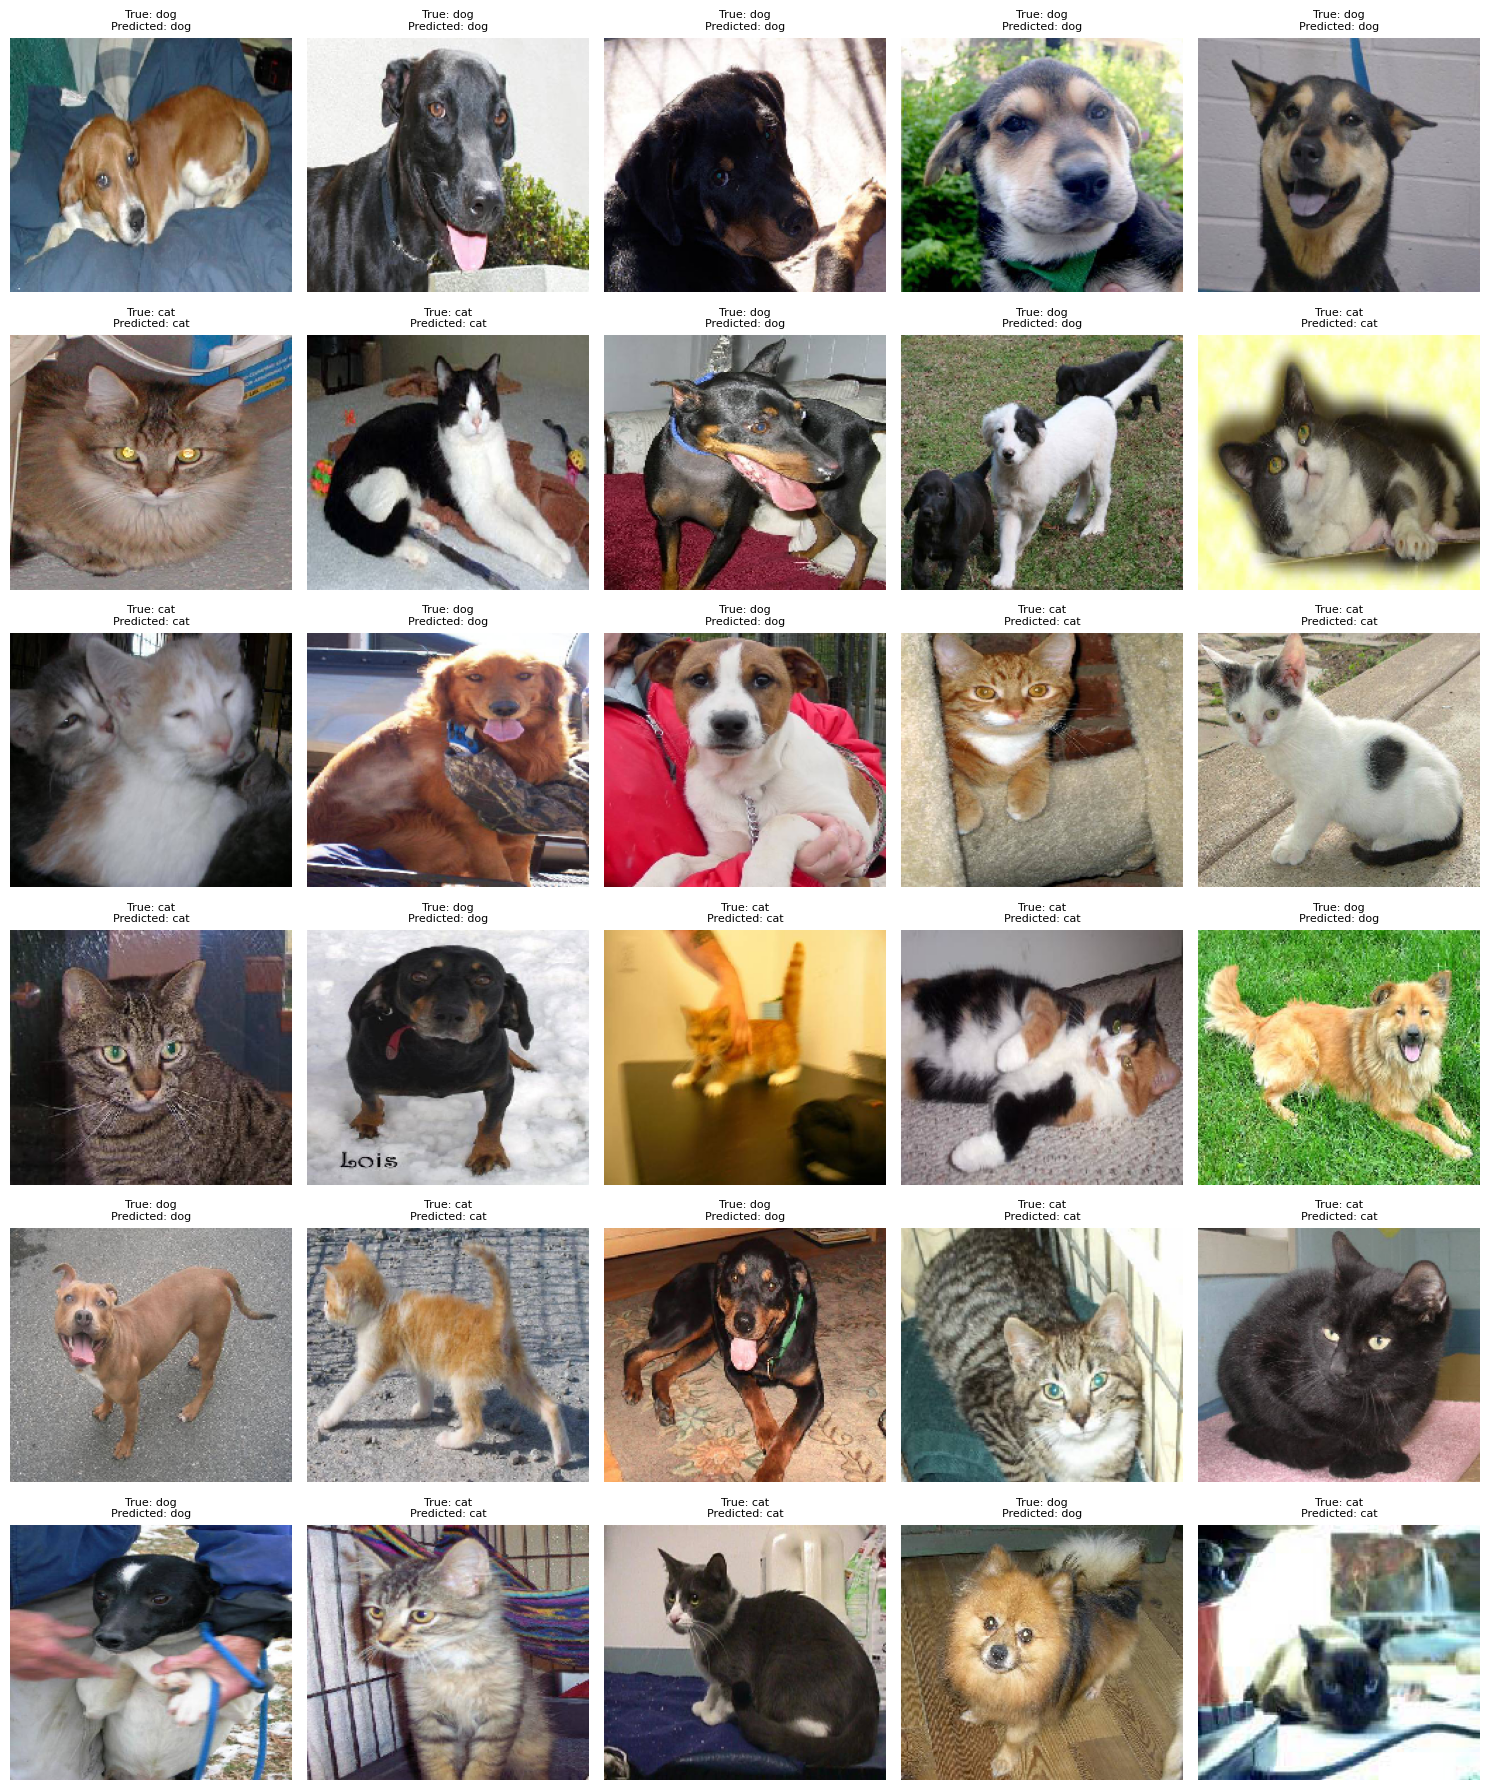

In [60]:
test_data_dir="test"

test_datagen = ImageDataGenerator(rescale=1.0/255) 
test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(images_size, images_size),
    batch_size = 32,
    class_mode='categorical')

true_labels = []
predicted_labels = []
class_names = test_generator.class_indices.keys()
class_names = list(class_names)

print(len(test_generator))
# Iterate over all batches in the generator
for i in range(len(test_generator)):
    x_batch, y_batch = test_generator[i]

    # Check if the shape of y_batch is what you expect
    if y_batch.ndim == 1:
        y_batch = tf.keras.utils.to_categorical(y_batch, num_classes=len(class_names))

    # Predictions
    predictions = model.predict(x_batch)

    # Convert class indices to class labels
    true_labels.extend(np.argmax(y_batch, axis=1))
    predicted_labels.extend(np.argmax(predictions, axis=1))

# Convert class indices to class labels
true_class_labels = [class_names[i] for i in true_labels]
predicted_class_labels = [class_names[i] for i in predicted_labels]

# Plot true labels and predicted labels
plt.figure(figsize=(10, 5))
num_samples_to_display = min(10, len(x_batch))  # Display up to 10 samples or less if available
xx=0
img_list = x_batch[:30]

# Set the size of the plot
fig, axes = plt.subplots(6, 5, figsize=(15, 18))

for i in range(6):
    for j in range(5):
        idx = i * 5 + j
        if idx < len(img_list):
            axes[i, j].imshow((img_list[idx] * 255).astype(np.uint8), aspect='auto')
            axes[i, j].set_title(f'True: {true_class_labels[idx]}\nPredicted: {predicted_class_labels[idx]}', fontsize=8)
            axes[i, j].axis('off')

plt.tight_layout()
plt.show()
        
    


## that's it as output ahead our project give 100% accuracy and that is our target 


##                                                          thanks 

